In [113]:
from sklearn.datasets import fetch_20newsgroups
newsgroups_train = fetch_20newsgroups(subset='train')

In [114]:
newsgroups_train.keys()

dict_keys(['data', 'filenames', 'target_names', 'target', 'DESCR'])

In [115]:
text = newsgroups_train['data'][0]
text

"From: lerxst@wam.umd.edu (where's my thing)\nSubject: WHAT car is this!?\nNntp-Posting-Host: rac3.wam.umd.edu\nOrganization: University of Maryland, College Park\nLines: 15\n\n I was wondering if anyone out there could enlighten me on this car I saw\nthe other day. It was a 2-door sports car, looked to be from the late 60s/\nearly 70s. It was called a Bricklin. The doors were really small. In addition,\nthe front bumper was separate from the rest of the body. This is \nall I know. If anyone can tellme a model name, engine specs, years\nof production, where this car is made, history, or whatever info you\nhave on this funky looking car, please e-mail.\n\nThanks,\n- IL\n   ---- brought to you by your neighborhood Lerxst ----\n\n\n\n\n"

In [116]:
newsgroups_train['data'][20]

'From: keith@cco.caltech.edu (Keith Allan Schneider)\nSubject: Re: <<Pompous ass\nOrganization: California Institute of Technology, Pasadena\nLines: 16\nNNTP-Posting-Host: punisher.caltech.edu\n\nlivesey@solntze.wpd.sgi.com (Jon Livesey) writes:\n\n[...]\n>>The "`little\' things" above were in reference to Germany, clearly.  People\n>>said that there were similar things in Germany, but no one could name any.\n>That\'s not true.  I gave you two examples.  One was the rather\n>pevasive anti-semitism in German Christianity well before Hitler\n>arrived.  The other was the system of social ranks that were used\n>in Imperail Germany and Austria to distinguish Jews from the rest \n>of the population.\n\nThese don\'t seem like "little things" to me.  At least, they are orders\nworse than the motto.  Do you think that the motto is a "little thing"\nthat will lead to worse things?\n\nkeith\n'

In [122]:
newsgroups_train['target']

array([7, 4, 4, ..., 3, 1, 8])

In [12]:
text.splitlines()

["From: lerxst@wam.umd.edu (where's my thing)",
 'Subject: WHAT car is this!?',
 'Nntp-Posting-Host: rac3.wam.umd.edu',
 'Organization: University of Maryland, College Park',
 'Lines: 15',
 '',
 ' I was wondering if anyone out there could enlighten me on this car I saw',
 'the other day. It was a 2-door sports car, looked to be from the late 60s/',
 'early 70s. It was called a Bricklin. The doors were really small. In addition,',
 'the front bumper was separate from the rest of the body. This is ',
 'all I know. If anyone can tellme a model name, engine specs, years',
 'of production, where this car is made, history, or whatever info you',
 'have on this funky looking car, please e-mail.',
 '',
 'Thanks,',
 '- IL',
 '   ---- brought to you by your neighborhood Lerxst ----',
 '',
 '',
 '',
 '']

In [13]:
from itertools import chain
from operator import methodcaller
from sklearn.datasets import fetch_20newsgroups
flatten = chain.from_iterable

In [38]:
def tokenizer(doc):
    return list(filter(None, flatten(map(methodcaller('split', ' '), doc.splitlines()))))
    # newsgroups_train = fetch_20newsgroups(subset='train')

In [39]:
corpus = newsgroups_train['data']
corpus_tokenized = list(map(tokenizer, corpus))

In [40]:
len(corpus_tokenized)

11314

In [41]:
assert min(map(len, corpus_tokenized)) > 0

In [47]:
# get word vectors by gensim
from gensim.models import word2vec


model = word2vec.Word2Vec(corpus_tokenized, size=100, window=5, min_count=10)
# model.save("word2vec.model")

In [48]:
model.wv.vectors.shape

(23655, 100)

In [49]:
X = model.wv.vectors

In [50]:
# calc GMM
from sklearn.mixture import GaussianMixture

gm = GaussianMixture(n_components=80, random_state=42)

In [51]:
gm.fit(X)

GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
                means_init=None, n_components=80, n_init=1,
                precisions_init=None, random_state=42, reg_covar=1e-06,
                tol=0.001, verbose=0, verbose_interval=10, warm_start=False,
                weights_init=None)

In [53]:
Y = gm.predict_proba(X)

In [54]:
Y.shape

(23655, 80)

In [104]:
import numpy as np

wcv = np.einsum('ij,ik->ijk', Y, X).reshape(X.shape[0], -1)
wcv.shape

(23655, 8000)

In [ ]:
# for sentence iwant to write

In [115]:
# idf
# build vocab
#from itertools import chain


#vocab = set(chain.from_iterable(corpus_tokenized))
#len(vocab)

287867

In [116]:
# get vocab from set
vocab = list(model.wv.vocab.keys())
len(vocab)

23655

In [119]:
len(corpus_tokenized)

11314

In [132]:
from operator import countOf

In [133]:
%%time

n_doc = len(corpus_tokenized)
idfs = []
for w in vocab:
    cnt = 0
    for doc in corpus_tokenized:
        if(countOf(doc, w)>0):
            cnt+=1
    df = cnt/n_doc
    idf = np.log(1/df)+1
    idfs.append(idf)

idfs

CPU times: user 25min 41s, sys: 0 ns, total: 25min 41s
Wall time: 25min 41s


[1.0,
 2.0913030227154756,
 1.0,
 7.075699637881619,
 4.305517655672403,
 1.3193490407509678,
 2.52791413567448,
 1.0423367526421263,
 2.126121751547819,
 1.1434544504336084,
 6.54960654198484,
 4.537738425137729,
 5.96434832343608,
 1.0033643236690977,
 3.8117033777329485,
 1.28186554067456,
 1.9840753384306122,
 4.861525502231626,
 1.9862057688730435,
 2.8825544909154246,
 2.284369118792407,
 2.228790638355855,
 2.7274087861304492,
 7.075699637881619,
 2.300137748016951,
 1.547492297620518,
 1.6968663028845303,
 4.5316778005260385,
 1.090117744316408,
 2.4628665791479585,
 5.258622360669274,
 2.461341025839121,
 1.1563923041731832,
 6.239451613681,
 5.660967341441195,
 4.776968114203563,
 1.14600820839743,
 1.588193323500154,
 1.9699872913862206,
 5.186301699089648,
 4.6036963929295265,
 3.7298523513026285,
 1.7333653859168079,
 6.6202241091987934,
 2.6204582870312305,
 3.076793468811028,
 7.500582831846885,
 1.7099033658278078,
 5.77991928430256,
 4.695441506569355,
 7.3893571967366

In [135]:
from itertools import repeat
from operator import contains

In [136]:
%%time

n_doc = len(corpus_tokenized)
cnts = []
for w in vocab:
    cnt = sum(map(contains, corpus_tokenized, repeat(w)))
    cnts.append(cnt)

idfs_2 = np.log(n_doc/np.array(cnts))+1
idfs_2

CPU times: user 20min 35s, sys: 0 ns, total: 20min 35s
Wall time: 20min 35s


array([ 1.        ,  2.09130302,  1.        , ..., 10.33379618,
       10.33379618, 10.33379618])

In [137]:
idfs_2.shape

(23655,)

In [145]:
np.allclose(np.array(idfs), idfs_2) # float effect

True

In [146]:
wtv = np.einsum('i,ij->ij', idfs, wcv)
wtv.shape

(23655, 8000)

In [150]:
wtv[[1,3,5]].sum(axis=0)

array([0., 0., 0., ..., 0., 0., 0.])

In [147]:
corpus_tokenized[0]

['From:',
 'lerxst@wam.umd.edu',
 "(where's",
 'my',
 'thing)',
 'Subject:',
 'WHAT',
 'car',
 'is',
 'this!?',
 'Nntp-Posting-Host:',
 'rac3.wam.umd.edu',
 'Organization:',
 'University',
 'of',
 'Maryland,',
 'College',
 'Park',
 'Lines:',
 '15',
 'I',
 'was',
 'wondering',
 'if',
 'anyone',
 'out',
 'there',
 'could',
 'enlighten',
 'me',
 'on',
 'this',
 'car',
 'I',
 'saw',
 'the',
 'other',
 'day.',
 'It',
 'was',
 'a',
 '2-door',
 'sports',
 'car,',
 'looked',
 'to',
 'be',
 'from',
 'the',
 'late',
 '60s/',
 'early',
 '70s.',
 'It',
 'was',
 'called',
 'a',
 'Bricklin.',
 'The',
 'doors',
 'were',
 'really',
 'small.',
 'In',
 'addition,',
 'the',
 'front',
 'bumper',
 'was',
 'separate',
 'from',
 'the',
 'rest',
 'of',
 'the',
 'body.',
 'This',
 'is',
 'all',
 'I',
 'know.',
 'If',
 'anyone',
 'can',
 'tellme',
 'a',
 'model',
 'name,',
 'engine',
 'specs,',
 'years',
 'of',
 'production,',
 'where',
 'this',
 'car',
 'is',
 'made,',
 'history,',
 'or',
 'whatever',
 'info',

In [159]:
def count(i=0):
    while True:
        yield i
        i+=1

In [160]:
dict(zip(['a','g'],count(6)))

{'a': 6, 'g': 7}

In [161]:
# list -> dict{ele:idx}
vocab_idx_map = dict(zip(vocab,count()))
vocab_idx_map

{'From:': 0,
 'my': 1,
 'Subject:': 2,
 'WHAT': 3,
 'car': 4,
 'is': 5,
 'Nntp-Posting-Host:': 6,
 'Organization:': 7,
 'University': 8,
 'of': 9,
 'Maryland,': 10,
 'College': 11,
 'Park': 12,
 'Lines:': 13,
 '15': 14,
 'I': 15,
 'was': 16,
 'wondering': 17,
 'if': 18,
 'anyone': 19,
 'out': 20,
 'there': 21,
 'could': 22,
 'enlighten': 23,
 'me': 24,
 'on': 25,
 'this': 26,
 'saw': 27,
 'the': 28,
 'other': 29,
 'day.': 30,
 'It': 31,
 'a': 32,
 'sports': 33,
 'car,': 34,
 'looked': 35,
 'to': 36,
 'be': 37,
 'from': 38,
 'late': 39,
 'early': 40,
 'called': 41,
 'The': 42,
 'doors': 43,
 'were': 44,
 'really': 45,
 'small.': 46,
 'In': 47,
 'addition,': 48,
 'front': 49,
 'bumper': 50,
 'separate': 51,
 'rest': 52,
 'body.': 53,
 'This': 54,
 'all': 55,
 'know.': 56,
 'If': 57,
 'can': 58,
 'model': 59,
 'name,': 60,
 'engine': 61,
 'specs,': 62,
 'years': 63,
 'production,': 64,
 'where': 65,
 'made,': 66,
 'history,': 67,
 'or': 68,
 'whatever': 69,
 'info': 70,
 'you': 71,
 'have

In [164]:
list(map(vocab_idx_map.get, corpus_tokenized[0]))

[0,
 None,
 None,
 1,
 None,
 2,
 3,
 4,
 5,
 None,
 6,
 None,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 4,
 15,
 27,
 28,
 29,
 30,
 31,
 16,
 32,
 None,
 33,
 34,
 35,
 36,
 37,
 38,
 28,
 39,
 None,
 40,
 None,
 31,
 16,
 41,
 32,
 None,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 28,
 49,
 50,
 16,
 51,
 38,
 28,
 52,
 9,
 28,
 53,
 54,
 5,
 55,
 15,
 56,
 57,
 19,
 58,
 None,
 32,
 59,
 60,
 61,
 62,
 63,
 9,
 64,
 65,
 26,
 4,
 5,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 25,
 26,
 None,
 73,
 34,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 36,
 71,
 81,
 82,
 83,
 None,
 79]

In [166]:
doc_idx = list(filter(lambda idx: idx is not None, map(vocab_idx_map.get, corpus_tokenized[0])))

In [167]:
wtv[doc_idx].shape

(111, 8000)

In [169]:
np.einsum('ij->j',wtv[doc_idx]).shape

(8000,)

In [174]:
dv = []
for doc in corpus_tokenized:
    doc_idx = list(filter(lambda idx: idx is not None, map(vocab_idx_map.get, doc)))
    dv.append(np.einsum('ij->j',wtv[doc_idx]))
dv = np.array(dv)

In [176]:
dv.shape

(11314, 8000)

In [177]:
np.save('idfs_2',idfs_2)

In [178]:
np.save('doc_vec',dv)

In [12]:
# load dv
import numpy as np


idfs_2 = np.load('idfs_2.npy')
dv = np.load('doc_vec.npy')
idfs_2.shape, dv.shape

((23655,), (11314, 8000))

In [14]:
idfs_2[2000:2500]

array([4.53470352, 6.22292231, 6.08530093, 5.19213262, 5.70882336,
       7.00159167, 8.1365716 , 7.56120745, 7.07569964, 3.40037315,
       7.9359009 , 5.48960909, 6.17491309, 7.03795931, 7.03795931,
       7.28927374, 5.58020598, 7.9359009 , 6.77844811, 7.11492035,
       6.19066145, 7.44342442, 8.03121108, 6.83728861, 7.19830196,
       5.82293667, 4.78472009, 4.94930111, 6.17491309, 5.30335825,
       6.17491309, 7.56120745, 6.08530093, 4.16418544, 7.00159167,
       4.87421066, 5.59759773, 6.12910356, 7.03795931, 5.71867566,
       5.13529914, 6.30844449, 4.5748944 , 6.64491672, 4.5019137 ,
       6.20666179, 4.6918891 , 7.28927374, 6.93259879, 4.99146192,
       7.15574235, 6.62022411, 5.31651634, 4.45047379, 7.3893572 ,
       5.89114492, 5.95176954, 5.42114129, 6.04333673, 7.62574597,
       6.17491309, 8.03121108, 4.06659563, 6.52713369, 7.62574597,
       5.97708735, 8.25435463, 7.44342442, 6.96650035, 6.46259516,
       4.91326118, 5.63331581, 4.64006404, 5.92707693, 5.28394

In [13]:
dv[0][1000:2000]

array([ 1.40227194e+00, -8.71056350e+00, -8.70229268e-01, -6.27935237e+00,
        1.01152406e+01, -5.74937170e+00,  6.66468646e+00,  3.78127337e+00,
        1.00952491e+01, -3.49119097e+00, -8.81463327e+00,  5.43884686e+00,
        5.85028211e+00,  6.13998867e+00, -8.45308035e+00,  7.45403405e+00,
        9.53624485e+00, -1.97420365e+00,  1.09081814e+01,  1.52246543e+01,
       -1.23459631e+00,  1.88321233e+01,  1.01064127e+00, -1.46978401e+00,
       -7.15902469e+00,  6.52332169e+00,  1.41248035e+01, -7.24560295e+00,
        8.95957367e+00, -3.10959366e+00,  1.39947402e+01, -4.29972590e+00,
        1.51007798e+01, -3.50640549e+00,  9.82719567e+00, -3.41428204e-01,
       -9.02978227e+00, -1.00555089e+01, -4.48819340e-01, -3.98467500e+00,
       -3.02021992e+00,  5.78196355e+00, -1.24731469e+01, -5.51839060e+00,
       -1.33259960e+01, -2.49956757e+00,  2.28845332e+00, -1.55099384e+01,
        8.20524668e+00,  3.35680007e+00, -2.56712562e+00,  3.25820394e+00,
       -1.03117028e+01, -

(array([1.00e+00, 1.00e+00, 3.00e+00, 1.30e+01, 3.10e+01, 4.80e+01,
        9.20e+01, 3.42e+02, 8.34e+02, 5.53e+03, 6.58e+02, 2.63e+02,
        8.30e+01, 5.80e+01, 2.30e+01, 1.20e+01, 5.00e+00, 0.00e+00,
        1.00e+00, 2.00e+00]),
 array([-91.80335893, -82.03303511, -72.26271129, -62.49238747,
        -52.72206365, -42.95173983, -33.181416  , -23.41109218,
        -13.64076836,  -3.87044454,   5.89987928,  15.6702031 ,
         25.44052692,  35.21085074,  44.98117456,  54.75149838,
         64.5218222 ,  74.29214602,  84.06246984,  93.83279366,
        103.60311748]),
 <a list of 20 Patch objects>)

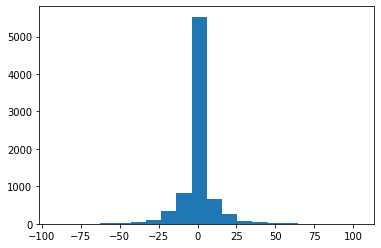

In [53]:
# visualize
import matplotlib.pyplot as plt

plt.hist(dv[0], bins=20)

In [43]:
# normalize
def _normalize_dv(dv: np.ndarray) -> np.ndarray:
    dv_sum = np.square(dv).sum(axis=1)
    dv_l2norm = np.sqrt(dv_sum)
    return np.einsum('ij,i->ij', dv, 1.0/dv_l2norm)

In [44]:
# normalize document vector

dv_norm = _normalize_dv(dv)
dv_norm.shape

(11314, 8000)

(array([3.000e+00, 1.000e+00, 4.000e+00, 8.000e+00, 9.000e+00, 3.200e+01,
        8.700e+01, 2.340e+02, 5.860e+02, 4.889e+03, 1.352e+03, 4.720e+02,
        2.050e+02, 7.200e+01, 2.600e+01, 1.200e+01, 3.000e+00, 2.000e+00,
        2.000e+00, 1.000e+00]),
 array([-0.09648031, -0.08675082, -0.07702133, -0.06729184, -0.05756234,
        -0.04783285, -0.03810336, -0.02837387, -0.01864438, -0.00891488,
         0.00081461,  0.0105441 ,  0.02027359,  0.03000309,  0.03973258,
         0.04946207,  0.05919156,  0.06892105,  0.07865055,  0.08838004,
         0.09810953]),
 <a list of 20 Patch objects>)

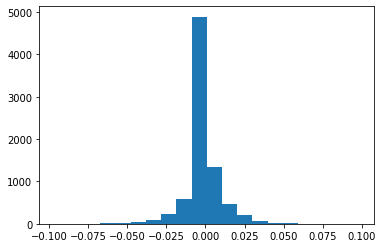

In [55]:
# visualize
import matplotlib.pyplot as plt

plt.hist(dv_norm[200], bins=20)

(array([3.0000000e+00, 5.0000000e+00, 4.9000000e+01, 2.5800000e+02,
        1.2110000e+03, 6.4510000e+03, 3.8112000e+04, 2.5059800e+05,
        2.7099690e+06, 8.0996669e+07, 5.9964190e+06, 4.3930900e+05,
        5.9800000e+04, 1.0316000e+04, 2.1110000e+03, 4.7900000e+02,
        1.6500000e+02, 5.1000000e+01, 1.3000000e+01, 1.2000000e+01]),
 array([-0.31133551, -0.2790092 , -0.24668288, -0.21435657, -0.18203025,
        -0.14970394, -0.11737762, -0.08505131, -0.05272499, -0.02039868,
         0.01192764,  0.04425395,  0.07658027,  0.10890658,  0.1412329 ,
         0.17355921,  0.20588553,  0.23821184,  0.27053816,  0.30286447,
         0.33519079]),
 <a list of 20 Patch objects>)

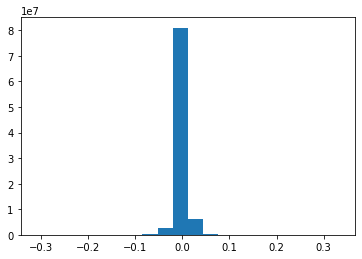

In [61]:
# plot all elements
plt.hist(dv_norm.flatten(), bins=20)

In [67]:
dv_norm.reshape(-1).shape # reference memory but copy memory if it's impossible

(90512000,)

In [58]:
%timeit dv_norm.flatten() # copy memory 

273 ms ± 337 µs per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [59]:
%timeit dv_norm.ravel() # reference memory (attention side effect if you assign this)

258 ns ± 0.589 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)


(array([3.0000000e+00, 5.0000000e+00, 4.9000000e+01, 2.5800000e+02,
        1.2110000e+03, 6.4510000e+03, 3.8112000e+04, 2.5059800e+05,
        2.7099690e+06, 8.0996669e+07, 5.9964190e+06, 4.3930900e+05,
        5.9800000e+04, 1.0316000e+04, 2.1110000e+03, 4.7900000e+02,
        1.6500000e+02, 5.1000000e+01, 1.3000000e+01, 1.2000000e+01]),
 array([-0.31133551, -0.2790092 , -0.24668288, -0.21435657, -0.18203025,
        -0.14970394, -0.11737762, -0.08505131, -0.05272499, -0.02039868,
         0.01192764,  0.04425395,  0.07658027,  0.10890658,  0.1412329 ,
         0.17355921,  0.20588553,  0.23821184,  0.27053816,  0.30286447,
         0.33519079]),
 <a list of 20 Patch objects>)

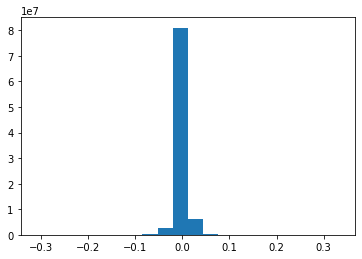

In [60]:
plt.hist(dv_norm.ravel(), bins=20)

In [82]:
arr = np.arange(-10,10).reshape(5,-1)
arr, np.min(arr, axis=1), np.max(arr, axis=1)

(array([[-10,  -9,  -8,  -7],
        [ -6,  -5,  -4,  -3],
        [ -2,  -1,   0,   1],
        [  2,   3,   4,   5],
        [  6,   7,   8,   9]]),
 array([10,  6,  2, -2, -6]),
 array([-7, -3,  1,  5,  9]))

In [78]:
np.min(arr, axis=1).mean()

-2.0

In [92]:
t = 0.5 * (np.abs(np.min(dv_norm, axis=1).mean()) + np.abs(np.max(dv_norm, axis=1).mean()))
p = 0.04

In [94]:
sparsity_threshold = p*t
sparsity_threshold

0.004530631641943684

In [95]:
mask = np.abs(dv_norm) < sparsity_threshold
mask.shape

(11314, 8000)

In [98]:
scdv = np.where(mask, 0.0, dv_norm)

In [100]:
scdv.shape

(11314, 8000)

### classification

In [159]:
X = scdv
y = newsgroups_train['target']
X.shape, y.shape

((11314, 8000), (11314,))

In [160]:
def kfold_splitter(n_samples, n_folds, rng):
    shuffled_fold_indices = rng.permutation(np.arange(n_samples) % n_folds)
    for k in range(n_folds):
        mask = shuffled_fold_indices == k
        yield tuple(map(np.flatnonzero, (mask, ~mask)))

In [162]:
n_fold = 5
n_samples = y.size
rng = np.random.RandomState(42)

for test_idx, train_idx in kfold_splitter(n_samples, n_fold, rng):
    y_test = y[test_idx]
    y_train = y[train_idx]
    X_test = X[test_idx]
    X_train = X[train_idx]
    break

In [166]:
y_train.size , y_test.size

(9051, 2263)

In [168]:
X_train.shape

(9051, 8000)

In [174]:
y_test.max()

19

In [193]:
from sklearn.metrics import confusion_matrix

np.diag(confusion_matrix(y_test, y_pred)).sum() / y_test.size

0.3225806451612903

In [195]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(random_state=0, max_depth=6, max_features='sqrt',
                             class_weight='balanced', n_jobs=-1)
clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight='balanced',
                       criterion='gini', max_depth=6, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [196]:
balanced_accuracy_score(y_train, clf.predict(X_train))

0.47469396090533095

In [197]:
y_pred = clf.predict(X_test)

In [198]:
from sklearn.metrics import balanced_accuracy_score

balanced_accuracy_score(y_test, y_pred)

0.3178137808112978

### work space

In [134]:
# what is map
f: x, y -> z
map: f, [x], [y] -> [z]

SyntaxError: invalid syntax (<ipython-input-134-2b9602d49667>, line 1)

In [26]:
list(filter(len, flatten(map(methodcaller('split',' '), text.splitlines()))))

['From:',
 'lerxst@wam.umd.edu',
 "(where's",
 'my',
 'thing)',
 'Subject:',
 'WHAT',
 'car',
 'is',
 'this!?',
 'Nntp-Posting-Host:',
 'rac3.wam.umd.edu',
 'Organization:',
 'University',
 'of',
 'Maryland,',
 'College',
 'Park',
 'Lines:',
 '15',
 'I',
 'was',
 'wondering',
 'if',
 'anyone',
 'out',
 'there',
 'could',
 'enlighten',
 'me',
 'on',
 'this',
 'car',
 'I',
 'saw',
 'the',
 'other',
 'day.',
 'It',
 'was',
 'a',
 '2-door',
 'sports',
 'car,',
 'looked',
 'to',
 'be',
 'from',
 'the',
 'late',
 '60s/',
 'early',
 '70s.',
 'It',
 'was',
 'called',
 'a',
 'Bricklin.',
 'The',
 'doors',
 'were',
 'really',
 'small.',
 'In',
 'addition,',
 'the',
 'front',
 'bumper',
 'was',
 'separate',
 'from',
 'the',
 'rest',
 'of',
 'the',
 'body.',
 'This',
 'is',
 'all',
 'I',
 'know.',
 'If',
 'anyone',
 'can',
 'tellme',
 'a',
 'model',
 'name,',
 'engine',
 'specs,',
 'years',
 'of',
 'production,',
 'where',
 'this',
 'car',
 'is',
 'made,',
 'history,',
 'or',
 'whatever',
 'info',

#### how to strip()

In [24]:
'aaabbba sdfsa'.strip('a')

'bbba sdfs'

In [25]:
'   abc   '.rstrip(), '   abc   '.lstrip(), '   abc   '.strip()

('   abc', 'abc   ', 'abc')

In [28]:
!pip install -U gensim

    100% |████████████████████████████████| 24.2MB 56kB/s  eta 0:00:01
    100% |████████████████████████████████| 71kB 11.4MB/s ta 0:00:01
Cache entry deserialization failed, entry ignored
    100% |████████████████████████████████| 20.2MB 68kB/s  eta 0:00:01
Cache entry deserialization failed, entry ignored
    100% |████████████████████████████████| 26.1MB 51kB/s  eta 0:00:01
Cache entry deserialization failed, entry ignored
  Cache entry deserialization failed, entry ignored
    100% |████████████████████████████████| 1.4MB 1.1MB/s eta 0:00:01
    100% |████████████████████████████████| 61kB 12.0MB/s ta 0:00:01
    100% |████████████████████████████████| 133kB 10.2MB/s ta 0:00:01
    100% |████████████████████████████████| 61kB 11.7MB/s ta 0:00:01
Cache entry deserialization failed, entry ignored
Requirement already up-to-date: chardet<3.1.0,>=3.0.2 in /home/ubuntu/anaconda3/lib/python3.6/site-packages (from requests->smart-open>=1.8.1->gensim)
    100% |███████████████████████████

You are using pip version 9.0.1, however version 19.3.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


#### tips

In [34]:
bool(0)

False

In [35]:
bool(None)

False

In [3]:
from gensim.test.utils import common_texts, get

In [6]:
common_texts

[['human', 'interface', 'computer'],
 ['survey', 'user', 'computer', 'system', 'response', 'time'],
 ['eps', 'user', 'interface', 'system'],
 ['system', 'human', 'system', 'eps'],
 ['user', 'response', 'time'],
 ['trees'],
 ['graph', 'trees'],
 ['graph', 'minors', 'trees'],
 ['graph', 'minors', 'survey']]

In [33]:
model = Word2Vec(common_texts, size=100, window=5, min_count=1, workers=4)
# model.save("word2vec.model")

In [19]:
modeln = Word2Vec.load("word2vec.model")
modeln.wv['computer']

array([ 2.7819069e-03,  9.2441525e-04, -1.8979424e-03, -5.1769923e-04,
       -2.0127434e-04, -1.2636177e-03, -1.1448647e-03, -8.3151029e-04,
        2.4810454e-03,  4.7200941e-03, -1.2033498e-03, -3.1806051e-03,
        4.6385811e-03,  2.2373793e-03,  3.7525155e-04,  4.3900716e-03,
       -3.9736805e-03,  3.0224093e-03,  4.3547698e-03,  3.8267684e-03,
        7.3397724e-04, -2.2790725e-03, -1.1162292e-03, -2.8515363e-03,
        3.5525644e-03,  9.0478203e-04, -2.9900870e-03, -3.1707853e-03,
       -2.3418618e-03, -3.2858373e-04, -2.1515773e-03, -2.1403297e-03,
        3.4834594e-03, -2.8811942e-03, -4.3998049e-03, -1.4437869e-03,
       -3.7635274e-03,  2.8408070e-03,  4.3373602e-03,  4.6798703e-03,
        3.6428398e-03, -2.9278533e-03,  2.5115572e-03, -4.3056998e-03,
       -1.1440270e-03,  2.6594882e-04, -1.3765184e-03, -2.5557424e-03,
       -4.6622511e-03, -3.4480926e-03,  4.3594656e-03,  2.2631711e-03,
       -3.0008496e-03, -6.1513681e-04, -1.6479194e-03, -3.3533908e-03,
      

In [20]:
!ls

NLP_practices.ipynb			 tfidf.json
SCDV.ipynb				 tfidf_removed.json
aozora_datasets.gz			 vocab.json
aozora_datasets_min			 vocab_removed.json
corpus.json				 word2vec.model
inner muscle training by Han Jiho.ipynb  word2vec_from_scratch.ipynb


####  einsum

In [79]:
a=np.arange(10)
np.einsum('i->', a)

45

In [81]:
a = np.arange(10).reshape(2, -1)
a

array([[0, 1, 2, 3, 4],
       [5, 6, 7, 8, 9]])

In [82]:
np.einsum('ij->i', a)

array([10, 35])

In [83]:
np.einsum('ij->j', a)

array([ 5,  7,  9, 11, 13])

In [85]:
np.einsum('ij->ji', a)

array([[0, 5],
       [1, 6],
       [2, 7],
       [3, 8],
       [4, 9]])

In [87]:
np.einsum('ij->j', a)

ValueError: einstein sum subscripts string includes output subscript 'j' multiple times

In [100]:
import numpy as np

A=np.random.rand(3,2)
B=np.zeros(3,3)
A,B[:,1]+[1,1,1]

TypeError: data type not understood

In [99]:
np.einsum('ij,ik->ijk', A, B)

array([[[0.25075086, 0.08919815, 0.1454242 ],
        [0.10630673, 0.03781588, 0.06165312]],

       [[0.02626674, 0.14842282, 0.0079017 ],
        [0.04962156, 0.28039151, 0.01492741]],

       [[0.52425877, 0.19568429, 0.34084245],
        [0.2287058 , 0.08536649, 0.14869116]]])

In [ ]:
np.einsum('ij,ik->ijk', P, X).reshape(X.shape[0], -1)